# **Multiple Linear Regression (MLR) Assignment: Marketing Data Analysis**
**By: KenJorren Culata**

CIS 3252.03 Business Intelligence

California Polytechnic Pomona Fall 2024


### Objectives

1. Build a multiple linear regression model to predict sales based on youtube, facebook, and newspaper advertising budgets.
2. Evaluate and interpret the model, checking assumptions to ensure model validity.


### 1. Data Loading and Exploration

**Step 1:** Load the marketing.csv file provided and inspect its structure.

In [81]:
# Importing necessary libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.read_csv('/content/marketing.csv')

In [82]:
# Provide a sample view of the dataset
df.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [83]:
# This data set has 200 entries. 4 columns: youtube, facebook, newspaper, sales. Datatype: float64. No missing entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    200 non-null    float64
 1   facebook   200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [84]:
# Verification of any missing entries
df.isnull().sum()

,0
youtube,0
facebook,0
newspaper,0
sales,0


In [85]:
# Verification of any duplicate entries
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


**Step 2:** Calculate basic statistics for each column (mean, standard deviation, min, max) to understand the data distribution.

In [86]:
# Statistical summary of numerical columns
df.describe()

,youtube,facebook,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,176.451000,27.916800,36.664800,16.827000
std,103.025084,17.816171,26.134345,6.260948
min,0.840000,0.000000,0.360000,1.920000
25%,89.250000,11.970000,15.300000,12.450000
50%,179.700000,27.480000,30.900000,15.480000
75%,262.590000,43.830000,54.120000,20.880000
max,355.680000,59.520000,136.800000,32.400000


**Step 3:** Plot each feature against sales to visualize potential relationships.

<Figure size 1000x600 with 0 Axes>

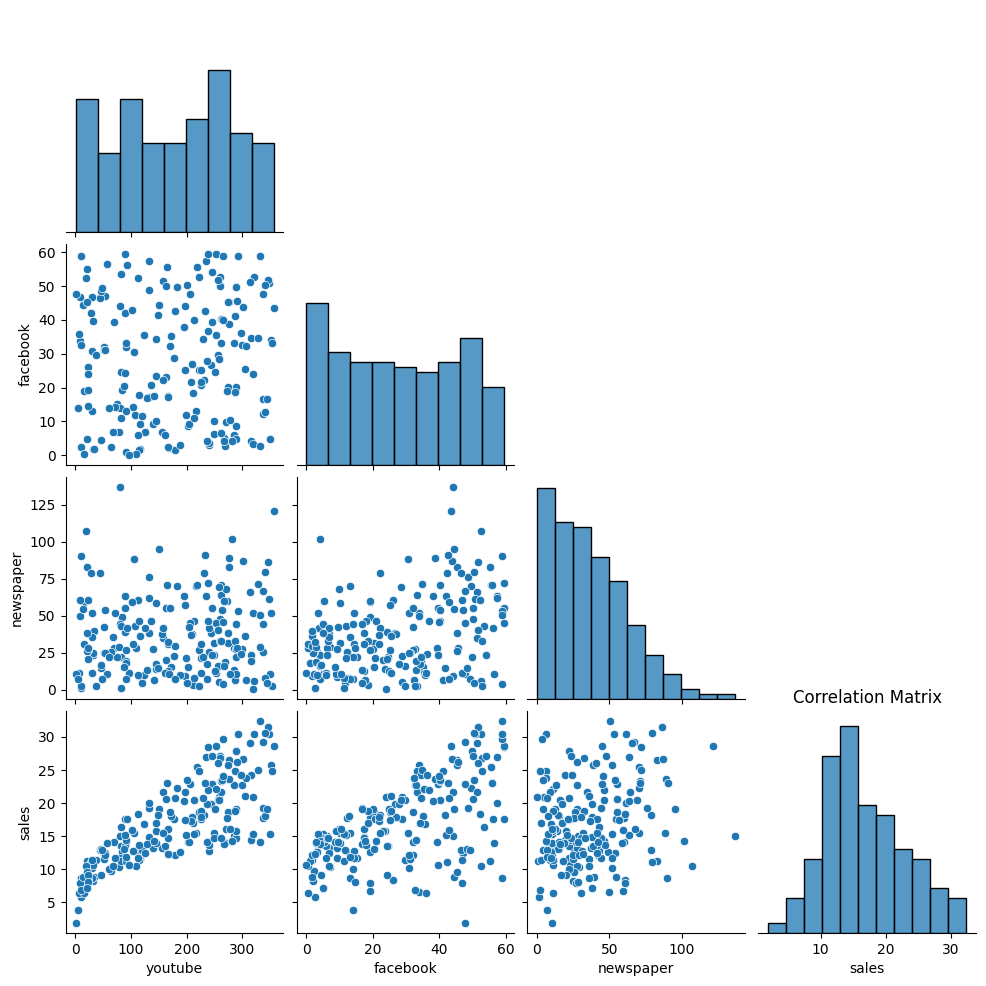

In [87]:
# Visualization to visualize
plt.figure(figsize=(10, 6))
sns.pairplot(df, corner=True)
plt.title('Correlation Matrix')
plt.show()

### 2. Multiple Linear Regression Model

**Step 1:** Define youtube, facebook, and newspaper as predictor variables and sales as the target variable.

In [88]:
# Defining Target (y) and Predictors (X), partitioning the dataset into 2 variables
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

In [89]:
# Adding a constant for the Intercept
X = sm.add_constant(X)

**Step 2:** Split the dataset into training and testing sets (70% training, 30% testing).

In [90]:
# Partitioning the dataset again for testing, resulting in 4 variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
# Verification of the shape of the X variable full (200), training (140), and testing dataset (60)
X.shape, X_train.shape, X_test.shape

((200, 4), (140, 4), (60, 4))

**Step 3:** Train a multiple linear regression model on the training data.

In [92]:
# Training an Ordinary Least Squares (OLS) linear regression model on training data.
model = sm.OLS(y_train, X_train).fit()

**Step 4:** Make predictions on the testing data and evaluate model performance using:

*   Mean Squared Error (MSE)
*   Root Mean Squared Error (RMSE)
*   R-squared score

In [93]:
# Define function to print the regression equation from the model coefficients
def print_regression_equation(model):
    intercept = model.params.iloc[0]

    # Get the coefficients for each predictor
    predictors = model.params.iloc[1:]
    equation = f"Price = {intercept:.4f}"

    # Add each predictor with its coefficient to the equation
    for predictor, coef in predictors.items():
        equation += f" + ({coef:.4f}) * {predictor}"

    return equation

In [94]:
# This provides a variable to present the predictions of my model
y_pred = model.predict(X_test)

In [95]:
# This provides the equation my model is using to determine predictions based on the dataset
print(print_regression_equation(model))

Price = 3.2507 + (0.0441) * youtube + (0.1993) * facebook + (0.0069) * newspaper


In [96]:
# Finding the values of Mean Squared Error (MSE), Root Mean Squared Error (RSME), and R-Squared to asses the model's overall fit and explainability.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [97]:
# Provides the average squared difference between predicted values and the actual values in the dataset.
print(f'Mean Squared Error: {mse:.2f}')
# Proportion of variance in sales explained by the model
print(f'R-squared: {r2:.2f}')
# Everytime that you use the model, you will have a 2.34+-, this is the noise in the model
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Squared Error: 5.47
R-squared: 0.86
Root Mean Squared Error: 2.34


### 3. Model Assumptions Check

To ensure the validity of your model, check the following assumptions:


*   Linearity: Verify linear relationships between predictors and the target.
*   Normality of Residuals: Plot a histogram or Q-Q plot of residuals.
*   Homoscedasticity: Check for constant variance of residuals across all levels of the predictor.
*   Multicollinearity: Check for high correlations among predictors (using VIF or a correlation matrix).

**Linearity**

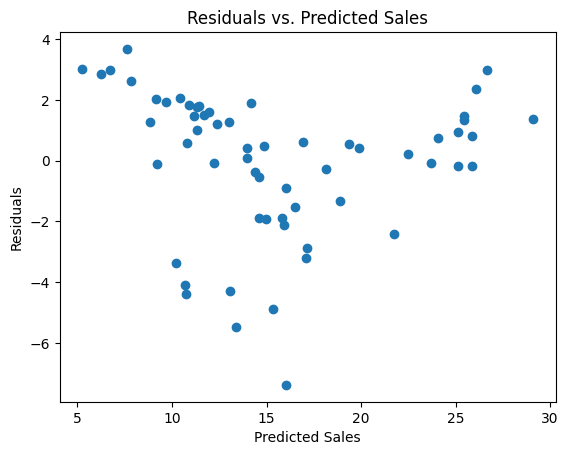

In [98]:
# Checking Linearity Assumption
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Sales')
plt.show()
# The results presents randomly scattered points representing linearity

**Normality of Residuals**

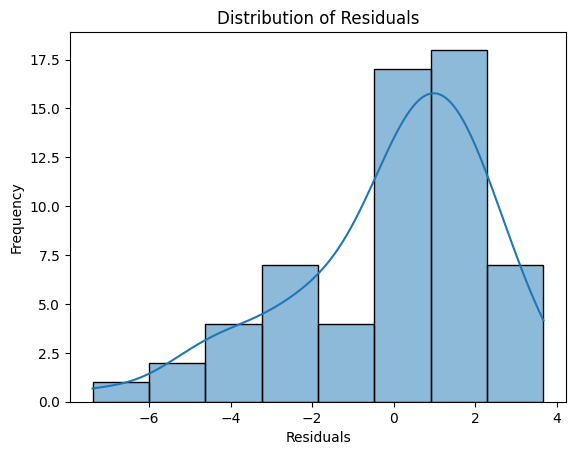

In [99]:
# Checking Normality Assumption
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()
# The results present a bell curve that represents normality

**Homoscedasticity**

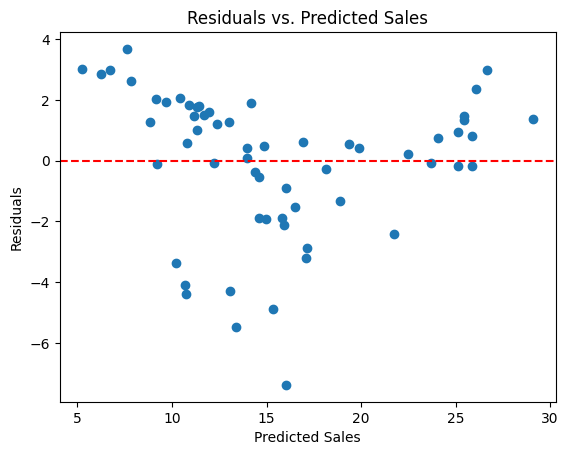

In [100]:
# Checking Homoscedasticity Assumption
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Sales')
plt.show()
#  The results checked for constant variance of residuals across all levels of the predictor.

**Multicollinearity**

In [101]:
# Checking Multicollinearity Assumtion
vif_data = pd.DataFrame()
vif_data["Features"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)
# The VIF values are less than 10, which represents that the predictors are not highly correlated

    Features       VIF
0      const  6.848900
1    youtube  1.004611
2   facebook  1.144952
3  newspaper  1.145187


### 4. Model Interpretation


*   Coefficients: Interpret the coefficients of each predictor to understand their impact on sales.
*   Significance: Identify which advertising channels (if any) are significant predictors of sales.
*   Model Summary: Summarize your findings, explaining which advertising channels have the most substantial effect on sales, based on coefficient size and significance.

**Model Summary**

In [102]:
# Displaying the model's summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.88e-69
Time:                        23:38:15   Log-Likelihood:                -287.74
No. Observations:                 140   AIC:                             583.5
Df Residuals:                     136   BIC:                             595.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2507      0.448      7.250      0.0

**Coefficients**

*   **Intercept (const): 3.2507**
*   **youtube Coefficient: 0.0441**
*   **facebook Coefficient: 0.1993**
*   **newspaper Coefficient: 0.0069**

**Significance**

**facebook advertisement (0.1993)** provides the highest coefficient related to the other modes of advertisements (0.0441, 0.0069), so we can conclude that **facebook advertisement has significance in generating sales.**

### 5. Analysis Questions

**What does each coefficient tell you about the relationship between the advertising budget and sales?**

The coefficient value represents the mean change in the response given a one unit change in the predictor so:

youtube with a coefficient of 0.0441, the sales will increase by 0.0441 for every one dollar invested in youtube.

facebook with a coefficient of 0.1993, the sales will increase by 0.1993 for every one dollar invested in facebook.

newspaper with a coefficient of 0.0069, the sales will increase by 0.0069 for every one dollar invested in newspaper.

**How well does this model explain the variation in sales?**

As observed earlier, using the value of R-squared which is 0.86 (86%). This indicates that the model explains the variability of the response data around it's mean. Knowing that the higher the R-Squared, the better the model fits the data, the model explains the variation in sales well.


**Are there any advertising channels that do not contribute significantly to the model? If so, consider possible reasons why.**

With the provided coefficients for youtube, facebook, and newspaper (0.0441, 0.1993, 0.0069) all being positive, none of the advertising channels impact the model negatively. If you were to decide which advertising channel to focus on more, facebook would be the best channel to decide on more investment to promote more sales according to the model.